In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,3)

In [2]:
fpath = '/Users/Rovidicus/Downloads/Crimes_-_2001_to_Present_20231221.csv'
df = pd.read_csv(fpath)
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11037294,JA371270,03/18/2015 12:00:00 PM,0000X W WACKER DR,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,BANK,False,False,...,42.0,32.0,11,NaN,NaN,2015,08/01/2017 03:52:26 PM,NaN,NaN,NaN
1,11646293,JC213749,12/20/2018 03:00:00 PM,023XX N LOCKWOOD AVE,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,APARTMENT,False,False,...,36.0,19.0,11,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
2,11645836,JC212333,05/01/2016 12:25:00 AM,055XX S ROCKWELL ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,...,15.0,63.0,11,NaN,NaN,2016,04/06/2019 04:04:43 PM,NaN,NaN,NaN
3,11645959,JC211511,12/20/2018 04:00:00 PM,045XX N ALBANY AVE,2820,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,False,...,33.0,14.0,08A,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
4,11645601,JC212935,06/01/2014 12:01:00 AM,087XX S SANGAMON ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,21.0,71.0,11,NaN,NaN,2014,04/06/2019 04:04:43 PM,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7960757 entries, 0 to 7960756
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Case Number           object 
 2   Date                  object 
 3   Block                 object 
 4   IUCR                  object 
 5   Primary Type          object 
 6   Description           object 
 7   Location Description  object 
 8   Arrest                bool   
 9   Domestic              bool   
 10  Beat                  int64  
 11  District              float64
 12  Ward                  float64
 13  Community Area        float64
 14  FBI Code              object 
 15  X Coordinate          float64
 16  Y Coordinate          float64
 17  Year                  int64  
 18  Updated On            object 
 19  Latitude              float64
 20  Longitude             float64
 21  Location              object 
dtypes: bool(2), float64(7), int64(3), object(1

In [4]:
# Making folder for files
OUTPUT_FOLDER = 'Data/Chicago/'
os.makedirs(OUTPUT_FOLDER, exist_ok=True)

In [5]:
# this cell can take up to 1 min to run
date_format = "%m/%d/%Y %H:%M:%S %p"

df['Datetime'] = pd.to_datetime(df['Date'], format=date_format)
df = df.sort_values('Datetime')
df

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Datetime
4535646,6808288,HR218860,01/01/2001 01:00:00 PM,004XX E OAKWOOD BLVD,0840,THEFT,FINANCIAL ID THEFT: OVER $300,APARTMENT,False,False,...,38.0,06,1179872.0,1878745.0,2001,05/07/2009 01:05:12 AM,41.822551,-87.615632,"(41.822551254, -87.615631965)",2001-01-01 01:00:00
2265832,1315987,G001152,01/01/2001 01:00:00 AM,009XX N HUDSON AV,1310,CRIMINAL DAMAGE,TO PROPERTY,CHA APARTMENT,False,False,...,NaN,14,1173036.0,1906862.0,2001,08/17/2015 03:03:40 PM,41.899860,-87.639877,"(41.899860332, -87.63987705)",2001-01-01 01:00:00
2292068,1311358,G001819,01/01/2001 01:00:00 PM,025XX W 45 PL,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,False,...,NaN,05,1160341.0,1874463.0,2001,08/17/2015 03:03:40 PM,41.811226,-87.687401,"(41.811226273, -87.687401084)",2001-01-01 01:00:00
2272892,1410662,G123231,01/01/2001 01:00:00 AM,007XX E 50 PL,0560,ASSAULT,SIMPLE,RESIDENCE,False,True,...,NaN,08A,1181985.0,1871730.0,2001,08/17/2015 03:03:40 PM,41.803253,-87.608098,"(41.803252854, -87.608097536)",2001-01-01 01:00:00
2213333,1311049,G000125,01/01/2001 01:00:00 AM,032XX W IRVING PARK RD,1310,CRIMINAL DAMAGE,TO PROPERTY,OTHER,False,False,...,NaN,14,1153841.0,1926448.0,2001,08/17/2015 03:03:40 PM,41.954010,-87.709858,"(41.954010014, -87.709857541)",2001-01-01 01:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176792,13308364,JG540707,12/13/2023 12:00:00 AM,009XX N CENTRAL AVE,5000,OTHER OFFENSE,OTHER CRIME AGAINST PERSON,SCHOOL - PUBLIC GROUNDS,False,False,...,25.0,26,1138841.0,1905867.0,2023,12/20/2023 03:41:19 PM,41.897820,-87.765501,"(41.897819723, -87.765501067)",2023-12-13 12:00:00
176515,13306164,JG539075,12/13/2023 12:00:00 AM,080XX S ADA ST,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,...,71.0,07,1168725.0,1851488.0,2023,12/20/2023 03:41:19 PM,41.748003,-87.657312,"(41.74800302, -87.657311635)",2023-12-13 12:00:00
177130,13307024,JG539951,12/13/2023 12:00:00 AM,017XX W FULTON ST,0313,ROBBERY,ARMED - OTHER DANGEROUS WEAPON,STREET,False,False,...,28.0,03,1164811.0,1902065.0,2023,12/20/2023 03:41:19 PM,41.886875,-87.670224,"(41.886875467, -87.670223622)",2023-12-13 12:00:00
176717,13306314,JG539304,12/13/2023 12:00:00 AM,029XX W MARQUETTE RD,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,...,66.0,14,1158052.0,1860071.0,2023,12/20/2023 03:41:19 PM,41.771780,-87.696188,"(41.771779541, -87.696188254)",2023-12-13 12:00:00


# Separate the Full Dataset by Years

In [6]:
df['Datetime'].dt.year

4535646    2001
2265832    2001
2292068    2001
2272892    2001
2213333    2001
           ... 
176792     2023
176515     2023
177130     2023
176717     2023
176513     2023
Name: Datetime, Length: 7960757, dtype: int64

In [7]:
# Removing 2023
filter_pre_2023 =  df['Datetime'].dt.year<2023
chicago_2023 = df[~filter_pre_2023]
df = df[filter_pre_2023]
df

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Datetime
4535646,6808288,HR218860,01/01/2001 01:00:00 PM,004XX E OAKWOOD BLVD,0840,THEFT,FINANCIAL ID THEFT: OVER $300,APARTMENT,False,False,...,38.0,06,1179872.0,1878745.0,2001,05/07/2009 01:05:12 AM,41.822551,-87.615632,"(41.822551254, -87.615631965)",2001-01-01 01:00:00
2265832,1315987,G001152,01/01/2001 01:00:00 AM,009XX N HUDSON AV,1310,CRIMINAL DAMAGE,TO PROPERTY,CHA APARTMENT,False,False,...,NaN,14,1173036.0,1906862.0,2001,08/17/2015 03:03:40 PM,41.899860,-87.639877,"(41.899860332, -87.63987705)",2001-01-01 01:00:00
2292068,1311358,G001819,01/01/2001 01:00:00 PM,025XX W 45 PL,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,False,...,NaN,05,1160341.0,1874463.0,2001,08/17/2015 03:03:40 PM,41.811226,-87.687401,"(41.811226273, -87.687401084)",2001-01-01 01:00:00
2272892,1410662,G123231,01/01/2001 01:00:00 AM,007XX E 50 PL,0560,ASSAULT,SIMPLE,RESIDENCE,False,True,...,NaN,08A,1181985.0,1871730.0,2001,08/17/2015 03:03:40 PM,41.803253,-87.608098,"(41.803252854, -87.608097536)",2001-01-01 01:00:00
2213333,1311049,G000125,01/01/2001 01:00:00 AM,032XX W IRVING PARK RD,1310,CRIMINAL DAMAGE,TO PROPERTY,OTHER,False,False,...,NaN,14,1153841.0,1926448.0,2001,08/17/2015 03:03:40 PM,41.954010,-87.709858,"(41.954010014, -87.709857541)",2001-01-01 01:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2004858,12937822,JF528703,12/31/2022 12:50:00 PM,070XX S GREEN ST,051A,ASSAULT,AGGRAVATED - HANDGUN,APARTMENT,False,True,...,68.0,04A,1171848.0,1858270.0,2022,01/07/2023 03:41:08 PM,41.766546,-87.645669,"(41.766545786, -87.64566932)",2022-12-31 12:50:00
678460,12938029,JF528801,12/31/2022 12:50:00 PM,018XX S HAMLIN AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,False,...,29.0,08A,1151347.0,1890681.0,2022,01/07/2023 03:41:08 PM,41.855911,-87.719966,"(41.855911352, -87.719966)",2022-12-31 12:50:00
722533,12937583,JF528218,12/31/2022 12:52:00 AM,010XX S WESTERN AVE,0460,BATTERY,SIMPLE,BARBERSHOP,False,False,...,28.0,08B,1160538.0,1895456.0,2022,01/07/2023 03:41:08 PM,41.868829,-87.686098,"(41.868829303, -87.686098247)",2022-12-31 12:52:00
691179,12938420,JF528704,12/31/2022 12:52:00 PM,027XX N ELSTON AVE,0560,ASSAULT,SIMPLE,COMMERCIAL / BUSINESS OFFICE,False,False,...,22.0,08A,1160488.0,1918000.0,2022,01/07/2023 03:41:08 PM,41.930693,-87.685657,"(41.930692897, -87.685656977)",2022-12-31 12:52:00


In [8]:
# save the years for every crime
df["Year"] = df['Datetime'].dt.year.astype(str)
df["Year"].value_counts()

C:\Users\Rovidicus\AppData\Local\Temp\ipykernel_2360\1413416881.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Year"] = df['Datetime'].dt.year.astype(str)


2002    486811
2001    485902
2003    475987
2004    469428
2005    453775
2006    448180
2007    437090
2008    427189
2009    392831
2010    370523
2011    352000
2012    336329
2013    307548
2014    275805
2016    269854
2017    269124
2018    268934
2015    264815
2019    261401
2022    239092
2020    212278
2021    208991
Name: Year, dtype: int64

In [9]:
## Dropping unneeded columns to reduce file size
drop_cols = ["X Coordinate","Y Coordinate", "Community Area","FBI Code",
             "Case Number","Updated On",'Block','Location','IUCR']

In [10]:
# save final df
chicago_final = df.drop(columns=drop_cols)
chicago_final = chicago_final.set_index('Datetime')
chicago_final

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Year,Latitude,Longitude
Datetime,,,,,,,,,,,,,
2001-01-01 01:00:00,6808288,01/01/2001 01:00:00 PM,THEFT,FINANCIAL ID THEFT: OVER $300,APARTMENT,False,False,213,2.0,3.0,2001,41.822551,-87.615632
2001-01-01 01:00:00,1315987,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO PROPERTY,CHA APARTMENT,False,False,1823,18.0,NaN,2001,41.899860,-87.639877
2001-01-01 01:00:00,1311358,01/01/2001 01:00:00 PM,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,False,914,9.0,NaN,2001,41.811226,-87.687401
2001-01-01 01:00:00,1410662,01/01/2001 01:00:00 AM,ASSAULT,SIMPLE,RESIDENCE,False,True,223,2.0,NaN,2001,41.803253,-87.608098
2001-01-01 01:00:00,1311049,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO PROPERTY,OTHER,False,False,1724,17.0,NaN,2001,41.954010,-87.709858
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 12:50:00,12937822,12/31/2022 12:50:00 PM,ASSAULT,AGGRAVATED - HANDGUN,APARTMENT,False,True,733,7.0,6.0,2022,41.766546,-87.645669
2022-12-31 12:50:00,12938029,12/31/2022 12:50:00 PM,ASSAULT,SIMPLE,APARTMENT,False,False,1014,10.0,24.0,2022,41.855911,-87.719966
2022-12-31 12:52:00,12937583,12/31/2022 12:52:00 AM,BATTERY,SIMPLE,BARBERSHOP,False,False,1135,11.0,28.0,2022,41.868829,-87.686098


In [11]:
# unique # of year bins
year_bins = chicago_final['Year'].astype(str).unique()
year_bins

array(['2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '2019', '2020', '2021', '2022'], dtype=object)

In [12]:
FINAL_DROP = ['Year']

In [13]:
## set save location 

# os.makedirs(OUTPUT_FOLDER, exist_ok=True)
# print(f"[i] Saving .csv's to {OUTPUT_FOLDER}")
## loop through years
# for year in year_bins:
    
    ## save temp slices of dfs to save.
#    temp_df = chicago_final.loc[year]
#    temp_df = temp_df.sort_index()
#    temp_df = temp_df.reset_index(drop=True)
#    temp_df = temp_df.drop(columns=FINAL_DROP)

    # save as csv to output folder
#    fname_temp = f"{OUTPUT_FOLDER}Chicago-Crime_{year}.csv"#.gz
#    temp_df.to_csv(fname_temp,index=False)## set save location 

#    print(f"- Succesfully saved {fname_temp}")

In [14]:
# import glob
# saved_files = sorted(glob.glob(OUTPUT_FOLDER+'*.*csv'))
# saved_files

In [15]:
## create a README.txt for the zip files
# readme = """Source URL: 
# - https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2
# - Filtered for years 2000-Present.

# Downloaded 07/18/2022
# - Files are split into 1 year per file.

# EXAMPLE USAGE:
# >> import glob
# >> import pandas as pd
# >> folder = "Data/Chicago/"
# >> crime_files = sorted(glob.glob(folder+"*.csv"))
# >> df = pd.concat([pd.read_csv(f) for f in crime_files])
# """
# print(readme)

# readme_fpath = f"{OUTPUT_FOLDER}README.txt"
# with open(readme_fpath,'w') as f:
#     f.write(readme)

# Making a Zip File

In [16]:
# readme_fpath

In [17]:
# saved_files.append(readme_fpath)
# saved_files

In [18]:
# ZIP_FILE = "Data/Chicago_Crime_2001-2022.zip"

In [19]:
# import zipfile
# final_fname = 'ExamData/Data Viz Belt Exam - OptionA.zip'
# with zipfile.ZipFile(ZIP_FILE,'w', 
#            compression=zipfile.ZIP_DEFLATED, compresslevel=9,) as zf:
#    for file in saved_files:
#        abspath = os.path.abspath(file)
        
#        zf.write(abspath, "Data/" + os.path.basename(abspath))

In [20]:
## opening google drive folder to upload zip
# import webbrowser
# link = "https://drive.google.com/drive/folders/1TQzVrf3Wc6g1lv2j1EwcyFyE64P6ursz?usp=drive_link"
# webbrowser.open(link)

### Comparing Police Districts
- Which district had the most crimes in 2022?
- Which had the least?

In [21]:
# Let's retrieve our df head
chicago_final.head()

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Year,Latitude,Longitude
Datetime,,,,,,,,,,,,,
2001-01-01 01:00:00,6808288,01/01/2001 01:00:00 PM,THEFT,FINANCIAL ID THEFT: OVER $300,APARTMENT,False,False,213,2.0,3.0,2001,41.822551,-87.615632
2001-01-01 01:00:00,1315987,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO PROPERTY,CHA APARTMENT,False,False,1823,18.0,NaN,2001,41.899860,-87.639877
2001-01-01 01:00:00,1311358,01/01/2001 01:00:00 PM,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,False,914,9.0,NaN,2001,41.811226,-87.687401
2001-01-01 01:00:00,1410662,01/01/2001 01:00:00 AM,ASSAULT,SIMPLE,RESIDENCE,False,True,223,2.0,NaN,2001,41.803253,-87.608098
2001-01-01 01:00:00,1311049,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO PROPERTY,OTHER,False,False,1724,17.0,NaN,2001,41.954010,-87.709858


In [22]:
# Making copy of df with Year == 2022
df_pd = chicago_final.loc[chicago_final['Year'] == '2022'].copy()
df_pd.head(3)

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Year,Latitude,Longitude
Datetime,,,,,,,,,,,,,
2022-01-01 01:00:00,12638059,01/01/2022 01:00:00 AM,OTHER OFFENSE,HARASSMENT BY ELECTRONIC MEANS,OTHER (SPECIFY),False,True,2413,24.0,50.0,2022,41.996603,-87.695945
2022-01-01 01:00:00,12583079,01/01/2022 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,923,9.0,14.0,2022,NaN,NaN
2022-01-01 01:00:00,12611949,01/01/2022 01:00:00 AM,THEFT,FROM BUILDING,BAR OR TAVERN,False,False,1832,18.0,42.0,2022,41.893822,-87.629710


In [23]:
df_pd['District'].value_counts()

8.0     14814
6.0     14712
12.0    14359
4.0     13950
11.0    13473
1.0     13063
18.0    12448
19.0    12266
25.0    11958
3.0     11933
2.0     11801
9.0     10375
7.0     10322
10.0     9973
5.0      9791
16.0     9244
24.0     8477
15.0     8310
14.0     8166
22.0     7678
17.0     6997
20.0     4968
31.0       14
Name: District, dtype: int64

In [24]:
df_pd['District'].isna().sum()

0

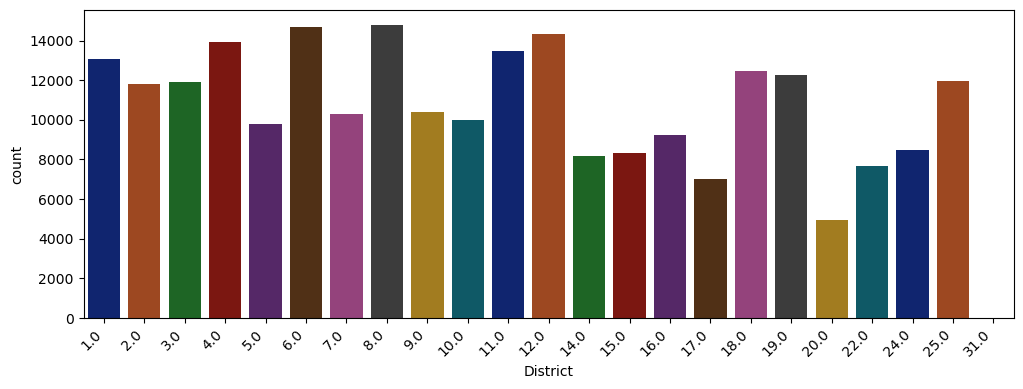

In [25]:
# If we just wanted to reduce it to a final tally, District 8 had the most individual crimes at 14814 and District 31 had 14.
# Here we'll put a countplot to show how many crimes are reported per district.
plt.figure(figsize=(12,4))
ax = sns.countplot(df_pd, x='District', palette='dark')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');

### Crimes Across the Years
- Is the total number of crimes increasing or decreasing across the years?
- Are there any individual crimes that are doing the opposite?

In [26]:
# Making new df to track crimes over time
cs = chicago_final.copy()

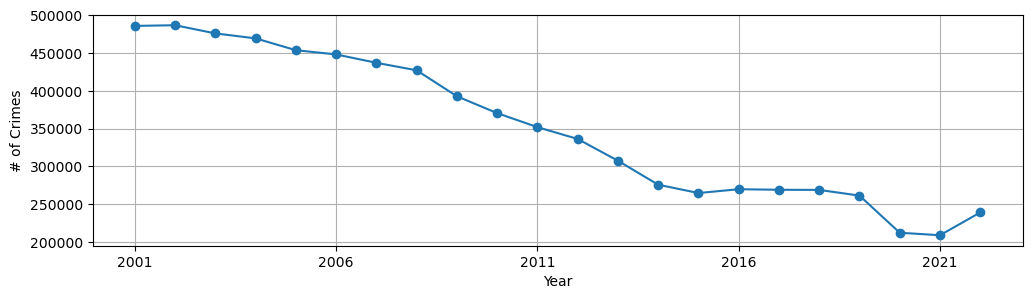

In [27]:
year_counts = cs['Year'].value_counts().sort_index()
year_counts.plot(style='o-',grid=True,ylabel='# of Crimes', xlabel='Year');

In [28]:
# That's interesting to have such a pronounced downward trend.
# Let's look at a timeline on a per crime basis. Pulling value counts to get specifics
cs['Primary Type'].value_counts()

THEFT                                1627045
BATTERY                              1410911
CRIMINAL DAMAGE                       878919
NARCOTICS                             746174
ASSAULT                               501115
OTHER OFFENSE                         479210
BURGLARY                              422253
MOTOR VEHICLE THEFT                   366590
DECEPTIVE PRACTICE                    341438
ROBBERY                               289677
CRIMINAL TRESPASS                     212867
WEAPONS VIOLATION                     103916
PROSTITUTION                           69750
OFFENSE INVOLVING CHILDREN             55363
PUBLIC PEACE VIOLATION                 52087
SEX OFFENSE                            30455
CRIM SEXUAL ASSAULT                    27554
INTERFERENCE WITH PUBLIC OFFICER       18207
LIQUOR LAW VIOLATION                   14846
GAMBLING                               14616
ARSON                                  13122
HOMICIDE                               12396
KIDNAPPING

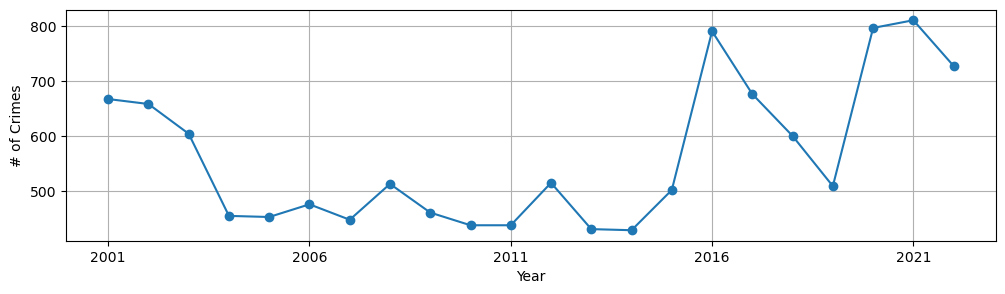

In [29]:
# Checking homicide
hom = cs.loc[cs['Primary Type'] == 'HOMICIDE']
hom_counts = hom['Year'].value_counts().sort_index()
hom_counts.plot(style='o-',grid=True,ylabel='# of Crimes', xlabel='Year');

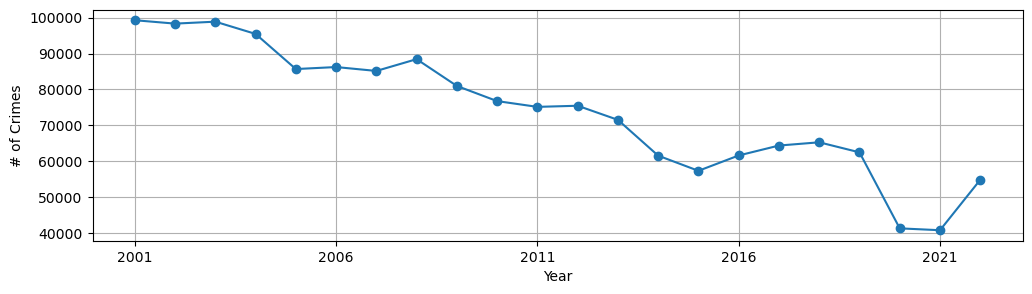

In [30]:
# Checking theft
th = cs.loc[cs['Primary Type'] == "THEFT"]
th_counts = th['Year'].value_counts().sort_index()
th_counts.plot(style='o-',grid=True,ylabel='# of Crimes', xlabel='Year');

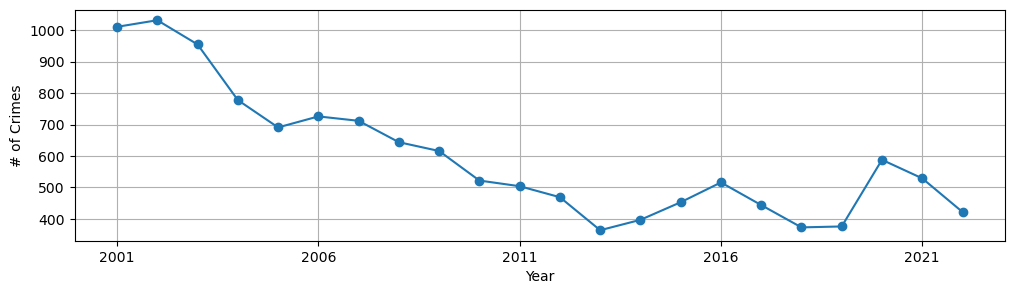

In [31]:
# Checking arson
arson = cs.loc[cs['Primary Type'] == "ARSON"]
arson_counts = arson['Year'].value_counts().sort_index()
arson_counts.plot(style='o-',grid=True,ylabel='# of Crimes', xlabel='Year');

#### While total crime count is declining, some crimes have resurged especially 2016 and 2020. Homicide is outright rising steeply

# Crime Count Forecast - Theft & Narcotics

In [32]:
cs.head()

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Year,Latitude,Longitude
Datetime,,,,,,,,,,,,,
2001-01-01 01:00:00,6808288,01/01/2001 01:00:00 PM,THEFT,FINANCIAL ID THEFT: OVER $300,APARTMENT,False,False,213,2.0,3.0,2001,41.822551,-87.615632
2001-01-01 01:00:00,1315987,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO PROPERTY,CHA APARTMENT,False,False,1823,18.0,NaN,2001,41.899860,-87.639877
2001-01-01 01:00:00,1311358,01/01/2001 01:00:00 PM,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,False,914,9.0,NaN,2001,41.811226,-87.687401
2001-01-01 01:00:00,1410662,01/01/2001 01:00:00 AM,ASSAULT,SIMPLE,RESIDENCE,False,True,223,2.0,NaN,2001,41.803253,-87.608098
2001-01-01 01:00:00,1311049,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO PROPERTY,OTHER,False,False,1724,17.0,NaN,2001,41.954010,-87.709858


### Transform the data to obtain a time series of the crime count per month using .size().

In [33]:
## First, resample the data as annual 
cs_month  = cs.groupby('Primary Type').resample('M').size().reset_index()

In [34]:
## can pivot the result to have the datetime as the index and the crime as the columns
ts = cs_month.pivot(index='Datetime',columns='Primary Type')
ts.head()

0                                                             \
Primary Type ARSON ASSAULT BATTERY BURGLARY CONCEALED CARRY LICENSE VIOLATION   
Datetime                                                                        
2001-01-31    67.0  2123.0  6527.0   1934.0                               NaN   
2001-02-28    57.0  2029.0  6042.0   1666.0                               NaN   
2001-03-31    93.0  2824.0  7662.0   1832.0                               NaN   
2001-04-30    89.0  2746.0  8328.0   1932.0                               NaN   
2001-05-31    94.0  2903.0  8887.0   1997.0                               1.0   

                                                                          \
Primary Type CRIM SEXUAL ASSAULT CRIMINAL DAMAGE CRIMINAL SEXUAL ASSAULT   
Datetime                                                                   
2001-01-31                 162.0          3966.0                     4.0   
2001-02-28                 134.0          3665.0                     1.0   
2001-03-31                 149.0          4618.0                     5.0   
2001-04-30                 132.0          4922.0                     2.0   
2001-05-31                 155.0          4757.0                     2.0   

                                                   ...                \
Primary Type CRIMINAL TRESPASS DECEPTIVE PRACTICE  ... OTHER OFFENSE   
Datetime                                           ...                 
2001-01-31              1192.0             1398.0  ...        2800.0   
2001-02-28              1063.0             1163.0  ...        2488.0   
2001-03-31              1141.0             1313.0  ...        2836.0   
2001-04-30              1133.0             1199.0  ...        2483.0   
2001-05-31              1067.0             1261.0  ...        2528.0   

                                                                             \
Primary Type PROSTITUTION PUBLIC INDECENCY PUBLIC PEACE VIOLATION RITUALISM   
Datetime                                                                      
2001-01-31          563.0              NaN                  161.0       2.0   
2001-02-28          426.0              1.0                  173.0       0.0   
2001-03-31          550.0              0.0                  267.0       2.0   
2001-04-30          564.0              1.0                  229.0       1.0   
2001-05-31          503.0              1.0                  239.0       1.0   

                                                                     
Primary Type ROBBERY SEX OFFENSE STALKING   THEFT WEAPONS VIOLATION  
Datetime                                                             
2001-01-31    1396.0       218.0     26.0  7867.0             337.0  
2001-02-28    1159.0       149.0     13.0  6669.0             301.0  
2001-03-31    1399.0       184.0     17.0  7766.0             345.0  
2001-04-30    1341.0       169.0     29.0  7702.0             321.0  
2001-05-31    1491.0       227.0     12.0  8420.0             390.0  

[5 rows x 36 columns]

In [35]:
ts.columns

MultiIndex([(0,                             'ARSON'),
            (0,                           'ASSAULT'),
            (0,                           'BATTERY'),
            (0,                          'BURGLARY'),
            (0, 'CONCEALED CARRY LICENSE VIOLATION'),
            (0,               'CRIM SEXUAL ASSAULT'),
            (0,                   'CRIMINAL DAMAGE'),
            (0,           'CRIMINAL SEXUAL ASSAULT'),
            (0,                 'CRIMINAL TRESPASS'),
            (0,                'DECEPTIVE PRACTICE'),
            (0,                 'DOMESTIC VIOLENCE'),
            (0,                          'GAMBLING'),
            (0,                          'HOMICIDE'),
            (0,                 'HUMAN TRAFFICKING'),
            (0,  'INTERFERENCE WITH PUBLIC OFFICER'),
            (0,                      'INTIMIDATION'),
            (0,                        'KIDNAPPING'),
            (0,              'LIQUOR LAW VIOLATION'),
            (0,             

In [36]:
theft = ts.loc[:,(0,                             'THEFT')]
theft

Datetime
2001-01-31    7867.0
2001-02-28    6669.0
2001-03-31    7766.0
2001-04-30    7702.0
2001-05-31    8420.0
               ...  
2022-08-31    5249.0
2022-09-30    5122.0
2022-10-31    5243.0
2022-11-30    4720.0
2022-12-31    4420.0
Name: (0, THEFT), Length: 264, dtype: float64

In [37]:
narc = ts.loc[:,(0,                         'NARCOTICS')]
narc

Datetime
2001-01-31    4714.0
2001-02-28    4369.0
2001-03-31    4862.0
2001-04-30    4044.0
2001-05-31    4038.0
               ...  
2022-08-31     421.0
2022-09-30     381.0
2022-10-31     359.0
2022-11-30     344.0
2022-12-31     329.0
Name: (0, NARCOTICS), Length: 264, dtype: float64

### Check for and address null values.

In [38]:
theft.isna().sum()

0

In [39]:
narc.isna().sum()

0

### Decompose the Time series to detect seasonality and decide whether to use a seasonal model or not

In [40]:
import statsmodels.tsa.api as tsa
# Custom function for Ad Fuller Test
def get_adfuller_results(ts, alpha=.05, label='adfuller', **kwargs): #kwargs for adfuller()
    # Saving each output
    (test_stat, pval, nlags, nobs, crit_vals_d, 
    icbest ) = tsa.adfuller(ts, **kwargs)
    # Converting output to a dictionary with the interpretation of p
    adfuller_results = {'Test Statistic': test_stat,
                        "# of Lags Used":nlags, 
                       '# of Observations':nobs,
                        'p-value': round(pval,6),
                        'alpha': alpha,
                       'sig/stationary?': pval < alpha}
    return pd.DataFrame(adfuller_results, index =[label])

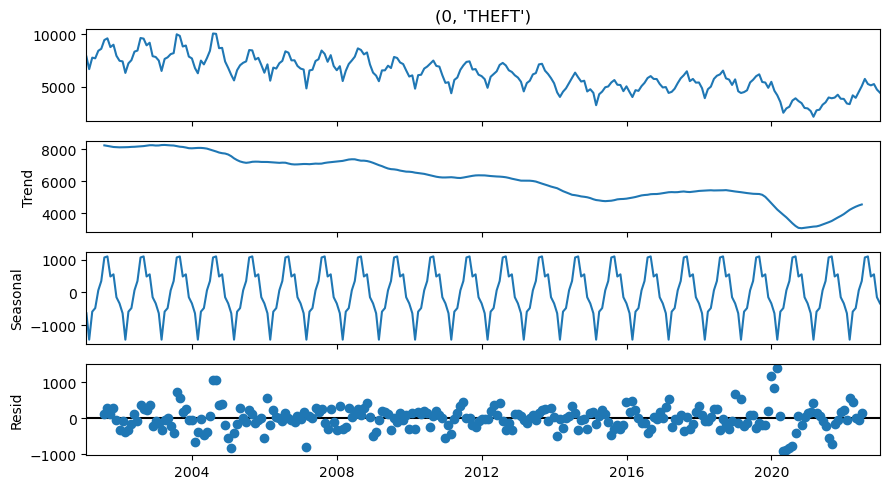

In [41]:
## Use Seasonal Decompose to check for seasonality
decomp = tsa.seasonal_decompose(theft)
fig = decomp.plot()
fig.set_size_inches(9, 5)
fig.tight_layout()

In [42]:
# How big is the seasonal component
seasonal_delta = decomp.seasonal.max() - decomp.seasonal.min()

# How big is the seasonal component relative to the time series?
print(f"The seasonal component is {seasonal_delta} which is ~{seasonal_delta/(theft.max()-theft.min()) * 100 :.2f}% of the variation in time.")

The seasonal component is 2549.982142857143 which is ~32.09% of the variation in time.


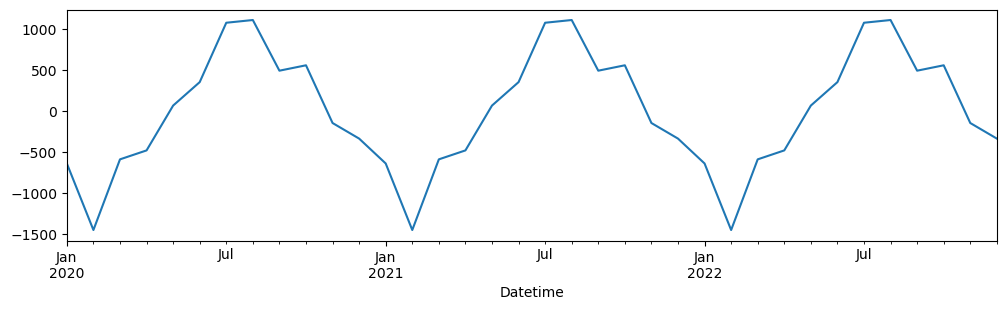

In [43]:
# zooming in on smaller time period to see length of season
decomp.seasonal.loc["2020":].plot();

### Theft seasonality increments are twelve months

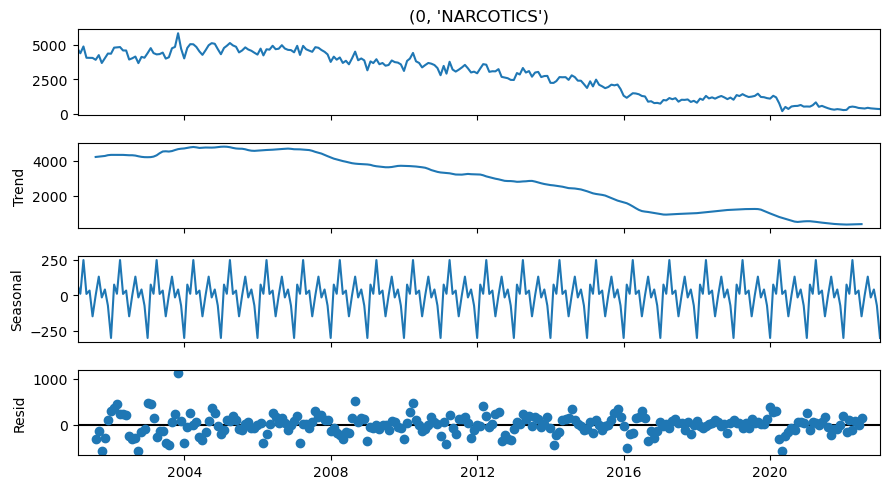

In [44]:
## Now decomposing narcotics
decomp = tsa.seasonal_decompose(narc)
fig = decomp.plot()
fig.set_size_inches(9, 5)
fig.tight_layout()

In [45]:
# How big is the seasonal component relative to the time series?
print(f"The seasonal component is {seasonal_delta} which is ~{seasonal_delta/(narc.max()-narc.min()) * 100 :.2f}% of the variation in time.")

The seasonal component is 2549.982142857143 which is ~45.20% of the variation in time.


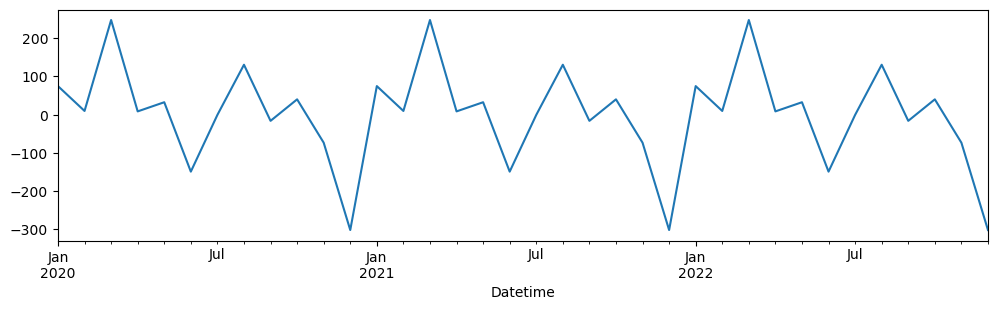

In [46]:
# zooming in on smaller time period to see length of season
decomp.seasonal.loc["2020":].plot();

### Narcotics related crimes likewise twelve months

In [47]:
# Both crimes have significant enough seasonal patterns to merit differencing
from pmdarima.arima.utils import ndiffs, nsdiffs
# Determine differencing
d = ndiffs(theft)
print(f'd is {d}')
D = nsdiffs(theft, m = 12)
print(f'D is {D}')

d is 1
D is 0


In [48]:
t_diff = theft.diff().dropna()

In [49]:
# Now differencing narcotics
d = ndiffs(narc)
print(f'd is {d}')
D = nsdiffs(narc, m = 12)
print(f'D is {D}')

d is 1
D is 0


In [50]:
n_diff = narc.diff().dropna()

### Use the ACF and PACF plots of stationarity data to estimate initial orders

# Forecasting Theft

In [51]:
def plot_acf_pacf(ts, nlags=40, figsize=(10, 5), 
                  annotate_sig=False, alpha=.05,
                 acf_kws={}, pacf_kws={},  
                  annotate_seas=False, m = None,
                 seas_color='black'):
    
    fig, axes = plt.subplots(nrows=2, figsize=figsize)
    
    # Sig lags line style
    sig_vline_kwargs = dict( ls=':', lw=1, zorder=0, color='red')
    # ACF
    tsa.graphics.plot_acf(ts, ax=axes[0], lags=nlags, **acf_kws)
    
    ## Annotating sig acf lags
    if annotate_sig == True:
        sig_acf_lags = get_sig_lags(ts,nlags=nlags,alpha=alpha, type='ACF')
        for lag in sig_acf_lags:
            axes[0].axvline(lag,label='sig', **sig_vline_kwargs )
    # PACF
    tsa.graphics.plot_pacf(ts,ax=axes[1], lags=nlags, **pacf_kws)
    
    ## Annotating sig pacf lags
    if annotate_sig == True:
        ## ANNOTATING SIG LAGS
        sig_pacf_lags = get_sig_lags(ts,nlags=nlags,alpha=alpha, type='PACF')
        for lag in sig_pacf_lags:
            axes[1].axvline(lag, label='sig', **sig_vline_kwargs)
    
    ### ANNOTATE SEASONS
    if annotate_seas == True:
        # Ensure m was defined
        if m is None:
            raise Exception("Must define value of m if annotate_seas=True.")
        ## Calculate number of complete seasons to annotate
        n_seasons = nlags//m 
        # Seasonal Lines style
        seas_vline_kwargs = dict( ls='--',lw=1, alpha=.7, color=seas_color, zorder=-1)
        
        ## for each season, add a line
        for i in range(1, n_seasons+1):
            axes[0].axvline(m*i, **seas_vline_kwargs, label="season")
            axes[1].axvline(m*i, **seas_vline_kwargs, label="season")
    fig.tight_layout()
    
    return fig

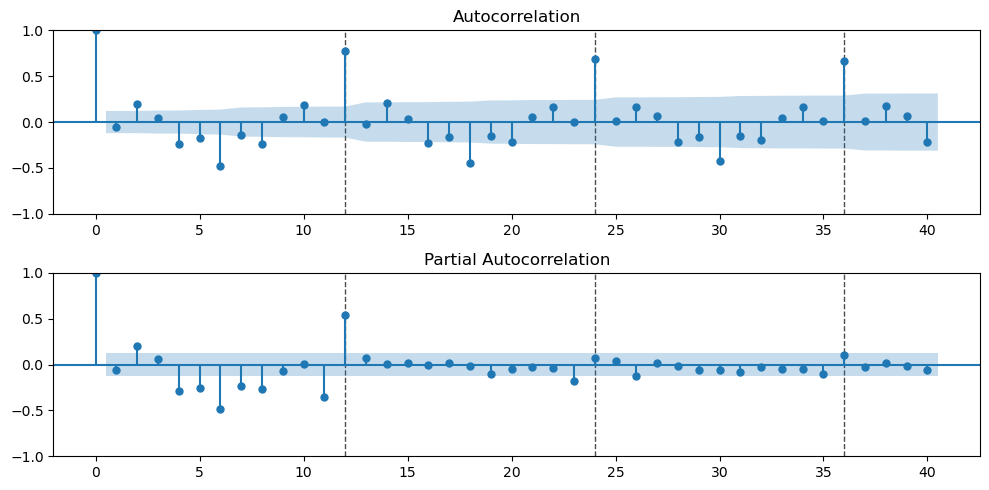

In [52]:
# Plotting theft​
plot_acf_pacf(t_diff, annotate_seas=True, m = 12);

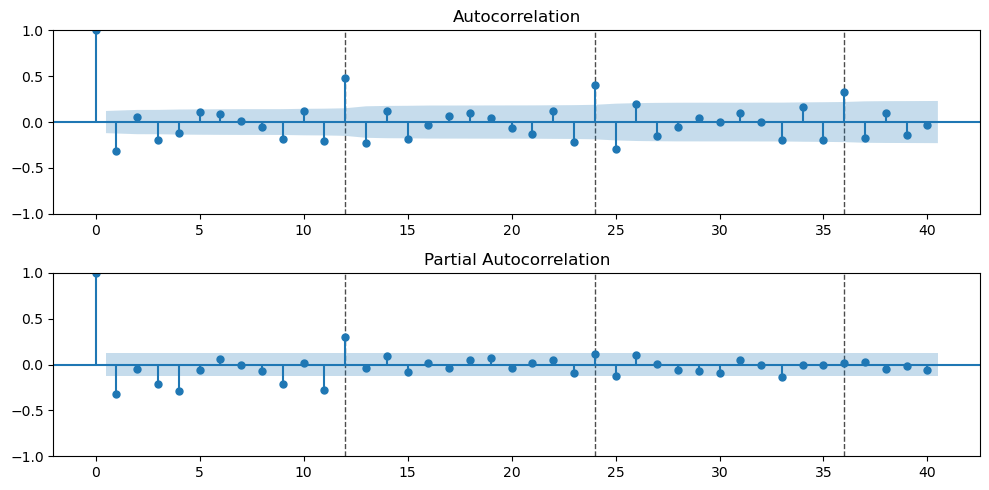

In [53]:
# Plotting narcotics
plot_acf_pacf(n_diff, annotate_seas=True, m = 12);

### Split the time series into training and test data (Predicting 6 months out)

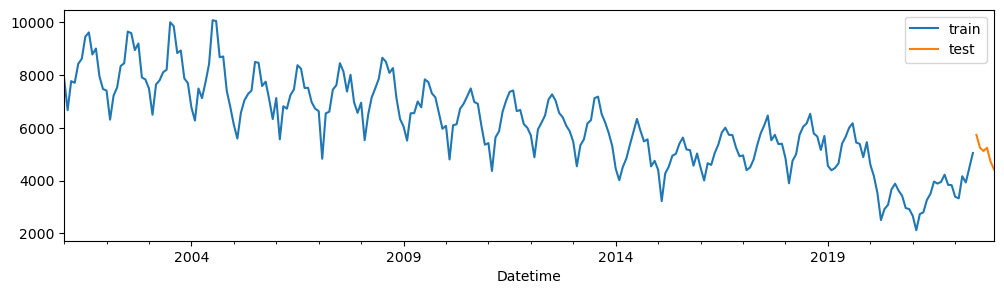

In [54]:
from pmdarima.model_selection import train_test_split

train, test = train_test_split(theft, test_size=6) # We've resampled monthly and need 6 months
## Visualize train-test-split
ax = train.plot(label="train")
test.plot(label="test")
ax.legend();

In [55]:
# To find a best combination, we can use a loop of sequences
import itertools

# Define the value or range of values for p, d, q
p_values = range(0, 3)  
d_values = [1]          
q_values = range(0, 3)  
P_values = range (0, 3)
D_values = [0]
Q_values = range (0,3)
m = [12]

# Create combinations of pdq to test
pdqPDQm_to_try = list(itertools.product(p_values, d_values, q_values, P_values, D_values, Q_values, m))

# Display first 10 combinations
pdqPDQm_to_try[:10]

[(0, 1, 0, 0, 0, 0, 12),
 (0, 1, 0, 0, 0, 1, 12),
 (0, 1, 0, 0, 0, 2, 12),
 (0, 1, 0, 1, 0, 0, 12),
 (0, 1, 0, 1, 0, 1, 12),
 (0, 1, 0, 1, 0, 2, 12),
 (0, 1, 0, 2, 0, 0, 12),
 (0, 1, 0, 2, 0, 1, 12),
 (0, 1, 0, 2, 0, 2, 12),
 (0, 1, 1, 0, 0, 0, 12)]

In [56]:
# define starting aic as infinity
best_aic = float("inf")  

# define baseline for pdq
best_pdqPDQm = (0,0,0,0,0,0,0)

# Loop through each combination
for pdqPDQm in pdqPDQm_to_try:
    order = pdqPDQm[:3] # first three values are non seasonal (p,d,q)
    seasonal_order = pdqPDQm[3:] # Remaining values for seasonal (P,D,Q,m)
    
    model = tsa.ARIMA(train, order=order, seasonal_order = seasonal_order)
    try:                         
        result = model.fit()
        print(pdqPDQm, result.aic)      
   
    except:
        print(f'{pdqPDQm}: caused an error')
    
    # If lower, replace best AIC with new value
    if result.aic < best_aic:
        
        best_aic = result.aic
        best_pdqPDQm = pdqPDQm

# Print the best orders and AIC score
print("Best AIC:", best_aic)
print("Best pdqPDQm:", best_pdqPDQm)

C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWar

(0, 1, 0, 0, 0, 0, 12) 4048.6148928354664
(0, 1, 0, 0, 0, 1, 12) 3914.427726608607


C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


(0, 1, 0, 0, 0, 2, 12) 3873.4523304562817
(0, 1, 0, 1, 0, 0, 12) 3799.6212656777952


C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWar

(0, 1, 0, 1, 0, 1, 12) 3754.7337170912424


C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


(0, 1, 0, 1, 0, 2, 12) 3753.4590016843117


C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


(0, 1, 0, 2, 0, 0, 12) 3783.186726047102


C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


(0, 1, 0, 2, 0, 1, 12) 3754.46042015398


C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


(0, 1, 0, 2, 0, 2, 12) 3753.6898219883415
(0, 1, 1, 0, 0, 0, 12) 4049.4062063653014


C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWar

(0, 1, 1, 0, 0, 1, 12) 3912.7718736985607


C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


(0, 1, 1, 0, 0, 2, 12) 3869.9521401018915
(0, 1, 1, 1, 0, 0, 12) 3790.142981157204


C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWar

(0, 1, 1, 1, 0, 1, 12) 3742.6042349008558


C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(0, 1, 1, 1, 0, 2, 12) 3741.375251355937


C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


(0, 1, 1, 2, 0, 0, 12) 3772.9638575250265


C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


(0, 1, 1, 2, 0, 1, 12) 3742.3964759256596


C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


(0, 1, 1, 2, 0, 2, 12) 3797.7007310771783
(0, 1, 2, 0, 0, 0, 12) 4029.7841272096452


C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWar

(0, 1, 2, 0, 0, 1, 12) 3906.5800793508133


C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


(0, 1, 2, 0, 0, 2, 12) 3866.694886898586


C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


(0, 1, 2, 1, 0, 0, 12) 3791.940949283281


C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


(0, 1, 2, 1, 0, 1, 12) 3744.5191113661053


C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


(0, 1, 2, 1, 0, 2, 12) 3743.313396307819


C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


(0, 1, 2, 2, 0, 0, 12) 3774.5682284687646


C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_mo

(0, 1, 2, 2, 0, 1, 12) 3765.64432126284
(0, 1, 2, 2, 0, 2, 12) 3788.1821917268207
(1, 1, 0, 0, 0, 0, 12) 4048.8883680404615


C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWar

(1, 1, 0, 0, 0, 1, 12) 3911.8630943688286


C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


(1, 1, 0, 0, 0, 2, 12) 3868.8281105677925


C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


(1, 1, 0, 1, 0, 0, 12) 3789.8227121262453


C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


(1, 1, 0, 1, 0, 1, 12) 3742.381043788392


C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


(1, 1, 0, 1, 0, 2, 12) 3741.352370033036


C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


(1, 1, 0, 2, 0, 0, 12) 3772.294819996854


C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_mo

(1, 1, 0, 2, 0, 1, 12) 3757.881172628712
(1, 1, 0, 2, 0, 2, 12) 3796.8202304605647
(1, 1, 1, 0, 0, 0, 12) 4048.147363748735


C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWar

(1, 1, 1, 0, 0, 1, 12) 3915.803746380194


C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


(1, 1, 1, 0, 0, 2, 12) 3869.726458844616


C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


(1, 1, 1, 1, 0, 0, 12) 3803.436620205189


C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


(1, 1, 1, 1, 0, 1, 12) 3758.9266299255323


C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


(1, 1, 1, 1, 0, 2, 12) 3757.216253229074


C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


(1, 1, 1, 2, 0, 0, 12) 3786.9826804358136


C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


(1, 1, 1, 2, 0, 1, 12) 3793.419122599392


C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_mo

(1, 1, 1, 2, 0, 2, 12) 3754.0747642562164
(1, 1, 2, 0, 0, 0, 12) 4026.9069086371805


C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


(1, 1, 2, 0, 0, 1, 12) 3916.7114154673436


C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


(1, 1, 2, 0, 0, 2, 12) 3868.6383577994084


C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


(1, 1, 2, 1, 0, 0, 12) 3794.143426505064


C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


(1, 1, 2, 1, 0, 1, 12) 3784.5398438339544


C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_mo

(1, 1, 2, 1, 0, 2, 12) 3784.7896389681246
(1, 1, 2, 2, 0, 0, 12) 3777.028244478378


C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


(1, 1, 2, 2, 0, 1, 12) 3746.408711955586


C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(1, 1, 2, 2, 0, 2, 12) 3790.420992079111
(2, 1, 0, 0, 0, 0, 12) 4038.2309777765727


C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWar

(2, 1, 0, 0, 0, 1, 12) 3910.323841359956


C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


(2, 1, 0, 0, 0, 2, 12) 3868.5113201981867


C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


(2, 1, 0, 1, 0, 0, 12) 3791.822577976527


C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


(2, 1, 0, 1, 0, 1, 12) 3744.3733808439583


C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(2, 1, 0, 1, 0, 2, 12) 3743.2982684667995


C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


(2, 1, 0, 2, 0, 0, 12) 3774.2263097801383


C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(2, 1, 0, 2, 0, 1, 12) 3762.924649092293


C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_mo

(2, 1, 0, 2, 0, 2, 12) 3750.0350826658732
(2, 1, 1, 0, 0, 0, 12) 4039.8871773820333


C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


(2, 1, 1, 0, 0, 1, 12) 3915.4213338309537


C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


(2, 1, 1, 0, 0, 2, 12) 3870.409366324905


C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


(2, 1, 1, 1, 0, 0, 12) 3793.8171390488224


C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


(2, 1, 1, 1, 0, 1, 12) 3745.277128493931


C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_mo

(2, 1, 1, 1, 0, 2, 12) 3744.747792965145
(2, 1, 1, 2, 0, 0, 12) 3776.2911614579502


C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


(2, 1, 1, 2, 0, 1, 12) 3787.284871406847


C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_mo

(2, 1, 1, 2, 0, 2, 12) 3824.09615884951
(2, 1, 2, 0, 0, 0, 12) 4017.7461700461035


C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\s

(2, 1, 2, 0, 0, 1, 12) 3900.4523657644486


C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\statespace\

(2, 1, 2, 0, 0, 2, 12) 3878.321092220365


C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\statespace\

(2, 1, 2, 1, 0, 0, 12) 3805.4926882825284
(2, 1, 2, 1, 0, 1, 12): caused an error


C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(2, 1, 2, 1, 0, 2, 12) 3779.900844091209


C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\s

(2, 1, 2, 2, 0, 0, 12) 3777.84131937411
(2, 1, 2, 2, 0, 1, 12) 3830.987686135877


C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\s

(2, 1, 2, 2, 0, 2, 12): caused an error
Best AIC: 3741.352370033036
Best pdqPDQm: (1, 1, 0, 1, 0, 2, 12)


In [57]:
# Orders for non seasonal components
p = 1  # nonseasonal AR
d = 1  # nonseasonal differencing
q = 0 # nonseasonal MA

# Orders for seasonal components (if seasonal model)
P = 1  # Seasonal AR
D = 0  # Seasonal differencing
Q = 2  # Seasonal MA
m = 12 # Seasonal period

sarima = tsa.ARIMA(train, order = (p,d,q), seasonal_order=(P,D,Q,m)).fit()

C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


In [58]:
# Obtain summary
sarima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                       
=============================================================================================
Dep. Variable:                          (0, 'THEFT')   No. Observations:                  258
Model:             ARIMA(1, 1, 0)x(1, 0, [1, 2], 12)   Log Likelihood               -1865.676
Date:                               Thu, 11 Jan 2024   AIC                           3741.352
Time:                                       23:41:15   BIC                           3759.098
Sample:                                   01-31-2001   HQIC                          3748.489
                                        - 06-30-2022                                         
Covariance Type:                                 opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2250      0.046     -4.930      0.000      -0.314      -0.136
ar.S.L12       0.9777      0.008    119.490      0.000       0.962       0.994
ma.S.L12      -0.5769      0.059     -9.810      0.000      -0.692      -0.462
ma.S.L24      -0.1198      0.068     -1.753      0.080      -0.254       0.014
sigma2      1.039e+05   7357.938     14.118      0.000    8.95e+04    1.18e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                30.45
Prob(Q):                              0.87   Prob(JB):                         0.00
Heteroskedasticity (H):               0.80   Skew:                            -0.44
Prob(H) (two-sided):                  0.31   Kurtosis:                         4.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [59]:
def plot_forecast(ts_train, ts_test, forecast_df, n_train_lags=None, 
                  figsize=(10,4), title='Comparing Forecast vs. True Data'):
    ### PLot training data, and forecast (with upper/,lower ci)
    fig, ax = plt.subplots(figsize=figsize)

    # setting the number of train lags to plot if not specified
    if n_train_lags==None:
        n_train_lags = len(ts_train)
            
    # Plotting Training  and test data
    ts_train.iloc[-n_train_lags:].plot(ax=ax, label="train")
    ts_test.plot(label="test", ax=ax)

    # Plot forecast
    forecast_df['mean'].plot(ax=ax, color='green', label="forecast")

    # Add the shaded confidence interval
    ax.fill_between(forecast_df.index, 
                    forecast_df['mean_ci_lower'],
                   forecast_df['mean_ci_upper'],
                   color='green', alpha=0.3,  lw=2)

    # set the title and add legend
    ax.set_title(title)
    ax.legend();
    
    return fig, ax

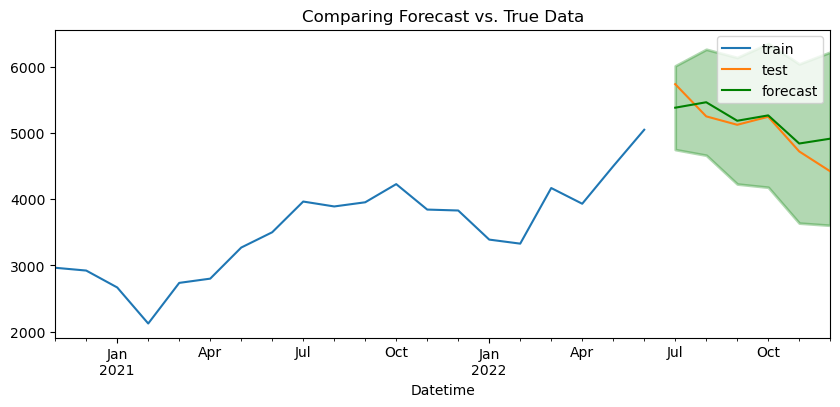

In [60]:
# Obtain summary of forecast as dataframe
forecast_df = sarima.get_forecast(len(test)).summary_frame()
# Plot the forecast with true values
plot_forecast(train, test, forecast_df, n_train_lags = 20);

In [61]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

def regression_metrics_ts(ts_true, ts_pred, label="", verbose=True, output_dict=False,):
    # Get metrics
    mae = mean_absolute_error(ts_true, ts_pred)
    mse = mean_squared_error(ts_true, ts_pred)
    rmse = mean_squared_error(ts_true, ts_pred, squared=False)
    r_squared = r2_score(ts_true, ts_pred)
    mae_perc = mean_absolute_percentage_error(ts_true, ts_pred) * 100

    if verbose == True:
        # Print Result with label
        header = "---" * 20
        print(header, f"Regression Metrics: {label}", header, sep="\n")
        print(f"- MAE = {mae:,.3f}")
        print(f"- MSE = {mse:,.3f}")
        print(f"- RMSE = {rmse:,.3f}")
        print(f"- R^2 = {r_squared:,.3f}")
        print(f"- MAPE = {mae_perc:,.2f}%")

    if output_dict == True:
        metrics = {
            "Label": label,
            "MAE": mae,
            "MSE": mse,
            "RMSE": rmse,
            "R^2": r_squared,
            "MAPE(%)": mae_perc,
        }
        return metrics

In [62]:
regression_metrics_ts(test, forecast_df["mean"])

------------------------------------------------------------
Regression Metrics: 
------------------------------------------------------------
- MAE = 210.270
- MSE = 72,059.307
- RMSE = 268.439
- R^2 = 0.589
- MAPE = 4.25%


In [63]:
#Tuning with pmdarima
import pmdarima as pm
# Default auto_arima will select model based on AIC score
auto_model = pm.auto_arima(
    train,
    seasonal=True,  # True or False
    m=12,  # if seasonal
    trace=True
)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=2.16 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=4050.536, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=3791.786, Time=0.42 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=3914.675, Time=0.44 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=4048.615, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=4050.819, Time=0.07 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=3774.279, Time=0.89 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=3744.253, Time=2.61 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=3744.035, Time=0.98 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=3913.781, Time=0.32 sec
 ARIMA(1,1,0)(1,0,2)[12] intercept   : AIC=3742.990, Time=1.68 sec
 ARIMA(1,1,0)(0,0,2)[12] intercept   : AIC=3870.780, Time=0.73 sec
 ARIMA(1,1,0)(2,0,2)[12] intercept   : AIC=inf, Time=5.50 sec
 ARIMA(0,1,0)(1,0,2)[12] intercept   : AIC=3754.931, Time=2.27 sec
 ARIMA(2,1,0)(1,0,2)[12] inte

In [64]:
# These are the same metrics as provided by the for loop. So instead we'll try a simple arima model
p = 1  # nonseasonal AR
d = 1  # nonseasonal differencing
q = 0  # nonseasonal MA

arima = tsa.ARIMA(train, order = (p,d,q)).fit()

# Obtain summary
arima.summary()

C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           (0, 'THEFT')   No. Observations:                  258
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -2022.444
Date:                Thu, 11 Jan 2024   AIC                           4048.888
Time:                        23:42:05   BIC                           4055.987
Sample:                    01-31-2001   HQIC                          4051.743
                         - 06-30-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0804      0.062     -1.301      0.193      -0.201       0.041
sigma2       3.98e+05   3.86e+04     10.311      0.000    3.22e+05    4.74e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.42   Jarque-Bera (JB):                 0.69
Prob(Q):                              0.52   Prob(JB):                         0.71
Heteroskedasticity (H):               0.35   Skew:                            -0.06
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.78
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

------------------------------------------------------------
Regression Metrics: 
------------------------------------------------------------
- MAE = 366.644
- MSE = 181,650.729
- RMSE = 426.205
- R^2 = -0.037
- MAPE = 7.25%


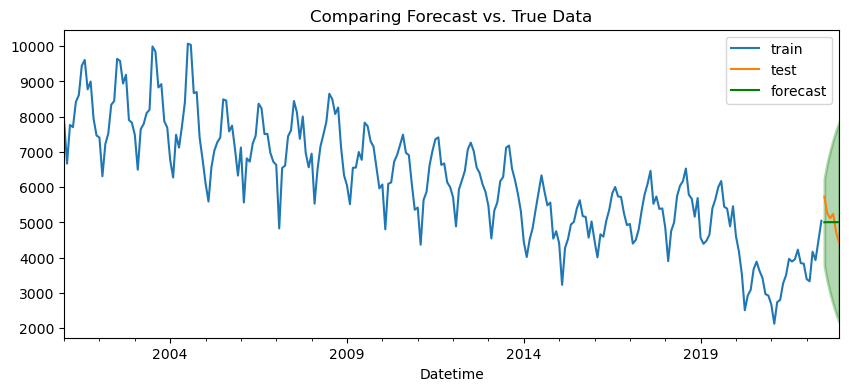

In [65]:
# Obtain forecast as a dataframe with confidence intervals
forecast_df = arima.get_forecast(steps=len(test)).summary_frame()
# Call the custom function to plot the forecasts with confidence intervals and true values
plot_forecast(train, test, forecast_df);
# Obtain metrics
regression_metrics_ts(test, forecast_df['mean'])

##### If there were any question to the importance of seasonality, this nonseasonal, useless forecast put it to rest.
##### We will use SARIMA for forecasting theft, with superior regression metrics all around.

### Making true future forecasts using the entire dataset (for dates beyond the entire ts)

In [66]:
# These are the parameters of our final model
# Orders for non seasonal components
p = 1  # nonseasonal AR
d = 1  # nonseasonal differencing
q = 0  # nonseasonal MA

# Orders for seasonal components
P = 1  # Seasonal AR
D = 0  # Seasonal differencing
Q = 2  # Seasonal MA
m = 12 # Seasonal period

final_model = tsa.ARIMA(theft, order = (p,d,q), seasonal_order=(P,D,Q,m)).fit()

C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


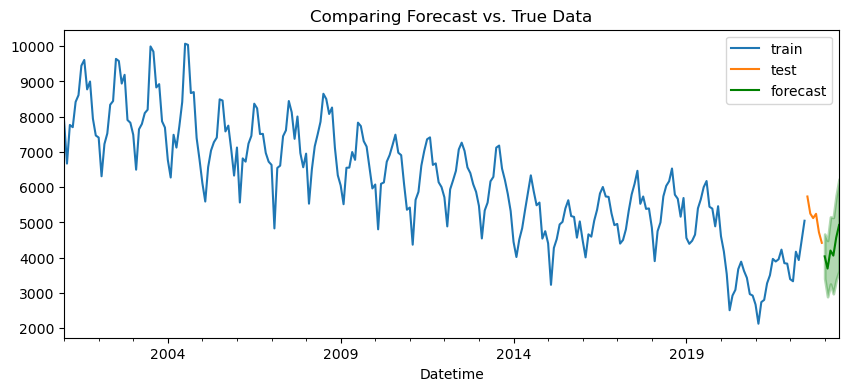

In [67]:
# Obtain future forecasts beyond test data
forecast_df  = final_model.get_forecast(len(test)).summary_frame()
plot_forecast(train, test, forecast_df);

### Consistent with the peaks and valleys of the graph, the model predicts a spike in thefts in the coming six months.
### Notice the "valleys" bottom out at the beginning of each year and appears to spike in summer.

### Calculate the predicted net change in the number (raw counts) of this type of crime from the beginning of the forecast to the end.

In [68]:
starting_value = forecast_df['mean'].iloc[0]
final_value = forecast_df['mean'].iloc[-1]
change = final_value - starting_value
change = change.round(0)
change

890.0

In [69]:
# Converting the raw delta into a percent change.
perc_change = (change / starting_value) * 100
perc_change

22.04868786026362

### Expect a decrease in theft of ~8.7% over the next six months

# Forecasting Narcotics

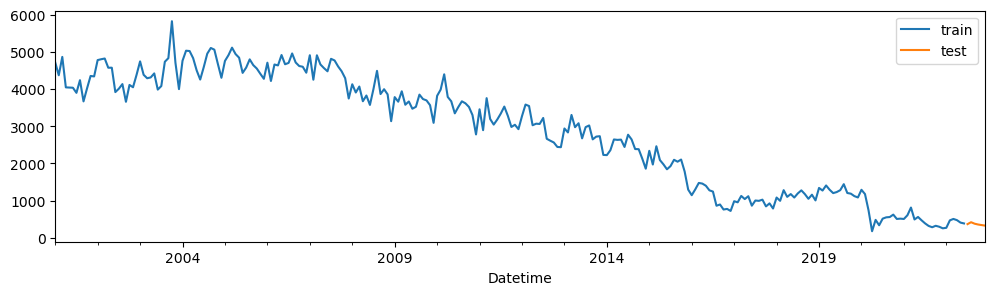

In [70]:
train, test = train_test_split(narc, test_size=6) # We've resampled monthly and need 6 months
## Visualize train-test-split
ax = train.plot(label="train")
test.plot(label="test")
ax.legend();

In [71]:
# This time we will try a simple arima model first
p = 1  # nonseasonal AR
d = 1  # nonseasonal differencing
q = 0  # nonseasonal MA

arima = tsa.ARIMA(train, order = (p,d,q)).fit()

# Obtain summary
arima.summary()

C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:       (0, 'NARCOTICS')   No. Observations:                  258
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -1819.314
Date:                Thu, 11 Jan 2024   AIC                           3642.628
Time:                        23:42:10   BIC                           3649.726
Sample:                    01-31-2001   HQIC                          3645.483
                         - 06-30-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3159      0.040     -7.816      0.000      -0.395      -0.237
sigma2      8.259e+04   6137.387     13.457      0.000    7.06e+04    9.46e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                 8.87
Prob(Q):                              0.83   Prob(JB):                         0.01
Heteroskedasticity (H):               0.25   Skew:                            -0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

------------------------------------------------------------
Regression Metrics: 
------------------------------------------------------------
- MAE = 35.751
- MSE = 1,564.882
- RMSE = 39.559
- R^2 = -0.821
- MAPE = 10.07%


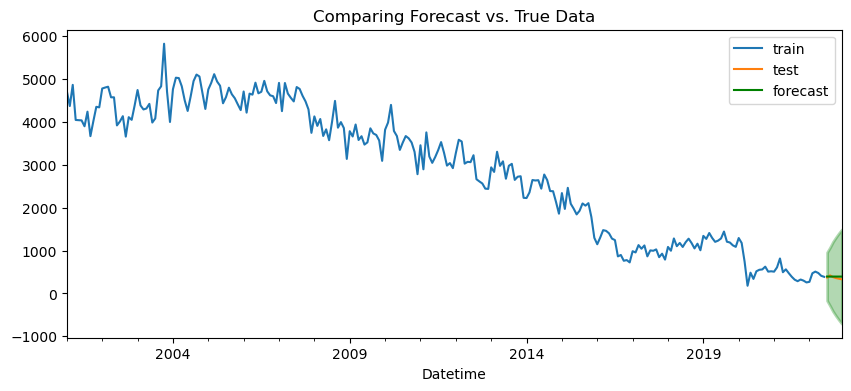

In [72]:
# Obtain forecast as a dataframe with confidence intervals
forecast_df = arima.get_forecast(steps=len(test)).summary_frame()
# Call the custom function to plot the forecasts with confidence intervals and true values
plot_forecast(train, test, forecast_df);
# Obtain metrics
regression_metrics_ts(test, forecast_df['mean'])

In [73]:
# This model is likewise poor. We will adjust to sarima
# Default auto_arima will select model based on AIC score
auto_model = pm.auto_arima(
    train,
    seasonal=True,  # True or False
    m=12,  # if seasonal
    trace=True
)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=1.61 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=3669.021, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=3583.957, Time=0.60 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=3595.913, Time=0.46 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=3667.818, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=3643.197, Time=0.06 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=3577.356, Time=1.51 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=3559.626, Time=2.29 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=3559.673, Time=0.77 sec
 ARIMA(1,1,0)(2,0,2)[12] intercept   : AIC=inf, Time=2.16 sec
 ARIMA(1,1,0)(1,0,2)[12] intercept   : AIC=3559.534, Time=2.60 sec
 ARIMA(1,1,0)(0,0,2)[12] intercept   : AIC=3589.824, Time=0.98 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=3602.924, Time=0.33 sec
 ARIMA(0,1,0)(1,0,2)[12] intercept   : AIC=3566.636, Time=1.65 sec
 ARIMA(2,1,0)(1,0,2)[12] inte

### Fitting a manual ARIMA/SARIMA model

In [74]:
# Orders for non seasonal components
p = 4  # nonseasonal AR
d = 1  # nonseasonal differencing
q = 0 # nonseasonal MA

# Orders for seasonal components (if seasonal model)
P = 1  # Seasonal AR
D = 0  # Seasonal differencing
Q = 1  # Seasonal MA
m = 12 # Seasonal period

sarima = tsa.ARIMA(train, order = (p,d,q), seasonal_order=(P,D,Q,m)).fit()

C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


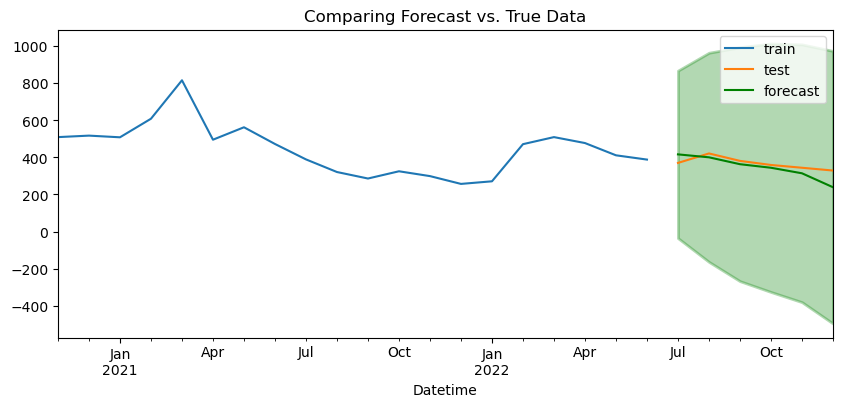

In [75]:
# Obtain summary of forecast as dataframe
forecast_df = sarima.get_forecast(len(test)).summary_frame()
# Plot the forecast with true values
plot_forecast(train, test, forecast_df, n_train_lags = 20);

In [76]:
regression_metrics_ts(test, forecast_df["mean"])

------------------------------------------------------------
Regression Metrics: 
------------------------------------------------------------
- MAE = 36.577
- MSE = 2,010.514
- RMSE = 44.839
- R^2 = -1.339
- MAPE = 10.38%


### Clearly there are other factors yet to be taken into account for narcotics crime
### The basic ARIMA model had superior metrics so that will be chosen

In [77]:
# These are the parameters of our final model
# Orders for non seasonal components
p = 1  # nonseasonal AR
d = 1  # nonseasonal differencing
q = 0  # nonseasonal MA
final_model = tsa.ARIMA(narc, order = (p,d,q)).fit()

C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rovidicus\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


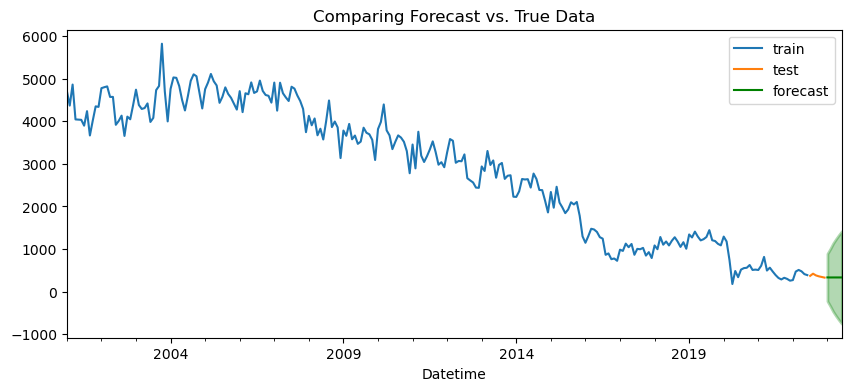

In [78]:
# Obtain future forecasts beyond test data
forecast_df  = final_model.get_forecast(len(test)).summary_frame()
plot_forecast(train, test, forecast_df);

### Just a steady rate next six months predicted. Unfortunately there's low confidence with this model. Narcotics crime is more irregular in pattern than theft

In [81]:
starting_value = forecast_df['mean'].iloc[0]
final_value = forecast_df['mean'].iloc[-1]
change = final_value - starting_value
change

-1.1406302451519537

In [80]:
perc_change = (change / starting_value) * 100
perc_change

-0.29963682341534176

#### 1. Of the two crimes, which is forecasted to have the highest monthly count of crimes at the end of the forecast? 

**Theft is several factors more common than drug offenses**

#### 2. Of the two crimes, which is forecasted to have the highest net change by the end of the forecast?

**Theft again, following the usual seasonal dip in winter**

#### 3. Of the two crimes, which is forecasted to have the highest percent change by the end of the forecast?

**Theft, having a 22% drop**

### What recommendation would you make to the stakeholders?

### The stakeholders being Chicago PD and its residents, be extra vigilant in summer months